<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<b>Владимир, привет!</b>

Меня зовут Владимир Бердников, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не совсем удобно для тебя — дай знать, и мы перейдем на "вы". Моя цель не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь улучшить навыки. 
    
Пожалуйста, не перемещай, не удаляй и не правь мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

При проверке работы я буду отмечать комментарии цветом и примечанием. В конце заголовка комментария указан номер итерации проверки.
<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Комментарии такого цвета нужно исправить, иначе проект не будет принят. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Такой комментарий является рекомендацией или советом. Mожешь учесть их при выполнении задания.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Так выделены все остальные комментарии, включая позитивные моменты, пояснения и рассуждения.
</div>  
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте — пиши об этом в комментариях, например, с помощью такого кода в markdown ячейке:

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента v_1: <a class="tocSkip"> </h2>

Ок.   

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Необходимо добавить вступление (этот пункт есть в блоке курса: Полезные инструкции для учёбы - Оформление проекта - Рекомендации по выполнению проектов):
    	
* заголовок 
* краткое описание проекта (желательно своими словами, не копируя из имеющегося описания)
* цель проекта
* описание данных (на усмотрение, данные можно описать в самой работе)
* план работы.

Со вступлением получатель отчета сможет получить общее представление о том, что будет в проекте

# Аналитика развлекательного приложения Procrastinate Pro+
### Описание. Компания вложила деньги в рекламу и терпит убытки. 
### Цель. Разобраться в причинах убытков, найти решения. 
### Описание данных.
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
orders_info_short.csv — информацию о заказах,
costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа.

Структура costs_info_short.csv:
dt — дата проведения рекламной кампании,
Channel — идентификатор рекламного источника,
costs — расходы на эту кампанию.
### План.
1. Предобраотка 
2. Анализ 
3. Маркетинговый анализ
4. Оценка окупаемости
5. Выводы

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Принято

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np  
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objs as go

In [2]:
# прочитали csv-файл
visits = pd.read_csv('/datasets/visits_info_short.csv')  # визиты
visits.name = 'visits'
orders = pd.read_csv('/datasets/orders_info_short.csv')  # заказы
orders.name = 'orders'
costs = pd.read_csv('/datasets/costs_info_short.csv')  # расходы
costs.name = 'costs'

In [3]:
# Изучите данные и выполните предобработку
def all_data_view(dataset):
    print('Информация о таблице', dataset.name)
    print()
    dataset.columns = dataset.columns.str.lower() # в названии колонок строчные буквы
    dataset.columns = dataset.columns.str.replace(" ", "_", regex=True) # вместо пробела '_'
    display(dataset.head(3)) # 3 первых записи
    print()
    dataset.info() # общая информация
    print()
    dataset.isnull().sum() # информация о пропущенных значениях 
    print()
    print('Количество дубликатов:', dataset.duplicated().sum())  # информация о дубликатах
    print()
    print('*'*100)
all_data_view(visits)
all_data_view(orders)
all_data_view(costs)

Информация о таблице visits



,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Количество дубликатов: 0

****************************************************************************************************
Информация о таблице orders



,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Количество дубликатов: 0

****************************************************************************************************
Информация о таблице costs



,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Количество дубликатов: 0

****************************************************************************************************


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Использовать функцию - отличное решение. 

In [4]:
# поиск неявных дубликатов

column = visits['region']
column.sort_values()
display(sorted(column.unique()))  # Просмотр уникальных значений

column = visits['device']
column.sort_values()
display(sorted(column.unique()))

column = visits['channel']
column.sort_values()
display(sorted(column.unique()))

column = costs['channel']
column.sort_values()
display(sorted(column.unique()))

['France', 'Germany', 'UK', 'United States']

['Android', 'Mac', 'PC', 'iPhone']

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

In [5]:
# изменим тип данных
# преобразование данных о времени
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['month'] = pd.DatetimeIndex(costs['dt']).month
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
#all_data_view(vizits)
#all_data_view(orders)
#all_data_view(costs)

Вывод.
1. Получена информация о таблицах
2. Имена столбцов приведены к нижнему регистру, пробелы заменены '_'
3. Пропуски, дубликаты и неявные дубликаты отсутсвуют 
4. Даты приведены к соответствующему формату
5. Данные готовы к дальнейшей обработке.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Отлично, пропуски и дубликаты проверены, соответствующие типы данных изменены, названия колонок переименованы. 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Еще можно проверить наличие неявных дубликатов в колонках с категориальными значениями. Хотя далее мы увидим, есть ли они в датасетах, но лучше на этапе предобработки в этом убедиться

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [6]:
# get_profiles() — для создания профилей пользователей, функция для создания пользовательских профилей

def get_profiles1(visits, orders, costs):
    
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [7]:
# get_retention() — для подсчёта Retention Rate,
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [8]:
# get_conversion() — для подсчёта конверсии,
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [9]:
# get_ltv() — для подсчёта LTV.
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [10]:
# filter_data() — для сглаживания данных,
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [11]:
# plot_retention() — для построения графика Retention Rate,
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [12]:
# plot_conversion() — для построения графика конверсии,

# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [13]:
# plot_ltv_roi — для визуализации LTV и ROI

# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [14]:
# Составьте профили пользователей. 
profiles = get_profiles1(visits, orders, costs)
display(profiles.head()) 

# Определите минимальную и максимальную даты привлечения пользователей
attraction_date_min = profiles['dt'].min()
attraction_date_max = profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', attraction_date_min) 
print('Максимальная дата привлечения пользователей:', attraction_date_max)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Вместо print() лучше использовать display(). С display() таблицы лучше выглядят в jupyter.
    
Минимальная и максимальная даты привлечения пользователей определены. Еще в описании проекта написано: "Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года". Желательно дописать, соответствуют ли результаты описанию. 

In [15]:
# функция для анализа данных 

def data_analysis(df, column):
    result = (
        df
        .groupby(column) # группируем по критерию
        .agg({
                'user_id': 'nunique', # считаем уникальных пользователей
                'payer': 'mean'  #, '${:,.2f}'.format, # и долю (среднее) платящих
        }) 
    )
    # вычисляем проценты
    result['payer'] = result['payer'] * 100 
    # переименовываем для удобства названия столбцов и индексов
    result = result.rename({'user_id': 'count_users', 'payer': '%_payers'}, axis=1)
    #result.index.name = index_name 
    result = result.sort_values('%_payers', ascending=False) # сортируем по убыванию доли платящих
    result = result.style.format({'%_payers': "{:,.2f}"})
    return result

In [16]:
# Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
# Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
display(data_analysis(profiles, 'region'))

,count_users,%_payers
region,,
United States,100002,6.90
Germany,14981,4.11
UK,17575,3.98
France,17450,3.80


In [17]:
# Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
# Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
display(data_analysis(profiles, 'device'))

,count_users,%_payers
device,,
Mac,30042,6.36
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05


In [18]:
# Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 
# Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
display(data_analysis(profiles, 'channel'))

,count_users,%_payers
channel,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


Вывод.
1. Данные о датах привлечения пользователей соответвуют описанию
2. В Регионе United States самое большое количество пользователей и доля платящих пользователей.
3. Пользователей среди владельцев iPhone самое большое количество, а самыми плаятщими являются пользователи владеющими устройствами Mac.
4. Пользователи "пришедшие" по своей инициативе ("organic") самые многочисленные и самые "не платящие". Самые "платящие" пользователи привлеченны каналом "FaceBoom".

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ Хорошо, таблицы созданы, доли платящих пользователей рассчитаны, результаты прокомментированы. Но что можно сделать лучше:
  
* округлить значения в колонке с долей платящих пользователей, например, до четырех знаков или можно вывести все значения в виде `12.20%`, округлив, например, до двух знаков, используя `style.format()` ([тут](https://sky.pro/wiki/python/otobrazhenie-data-frame-pandas-s-formatirovaniem-v-python/) ссылка на примеры). Вместо `f` можно указать `%`

Пример как еще можно сразу переименовать колонку в `agg()`:
    
      users=('user_id', 'nunique')

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [19]:
# Посчитайте общую сумму расходов на маркетинг.
print('Общая сумма расходов на маркетинг:', costs['costs'].sum().round(2))

Общая сумма расходов на маркетинг: 105497.3


In [20]:
# Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
result = (
        costs
        .groupby('channel') # группируем по критерию
        .agg({
                #'channel': 'nunique', # считаем уникальных пользователей
                'costs': 'sum' # сумма трат
            }) 
         )
result = result.sort_values('costs', ascending=False) 
display(result)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ В лидерах TipTop и FaceBoom. В таблицу можно добавить еще колонку с долей суммарных расходов по источникам, чтобы сравнить в относительных величинах.

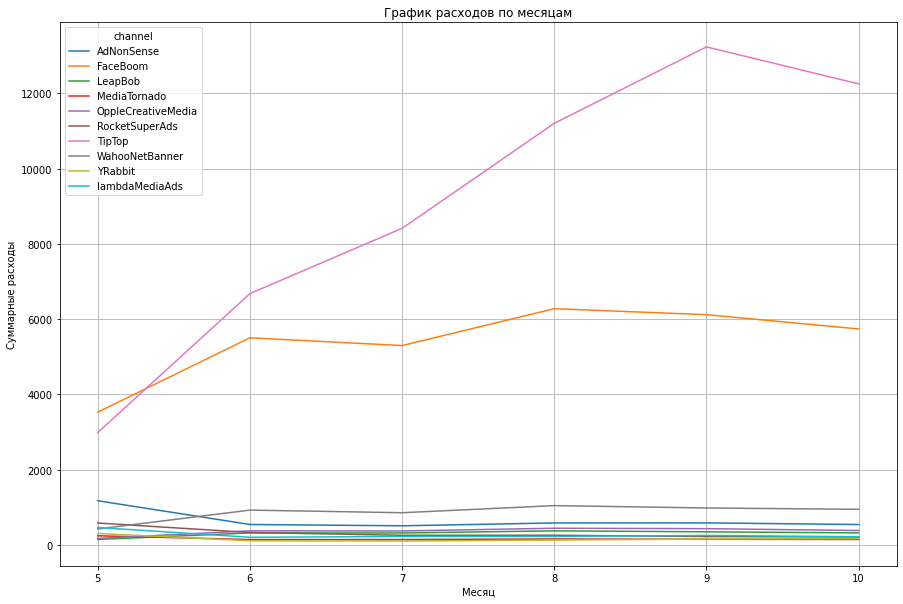

In [21]:
#  динамика изменения расходов во времени по месяцам по каждому источнику.
d2 = costs.pivot_table(index = 'month',
                        columns = 'channel',
                        values = 'costs',
                        aggfunc = 'sum')
d2 = d2.plot(figsize = (15, 10), grid=True)
plt.title('График расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные расходы')
plt.show() 

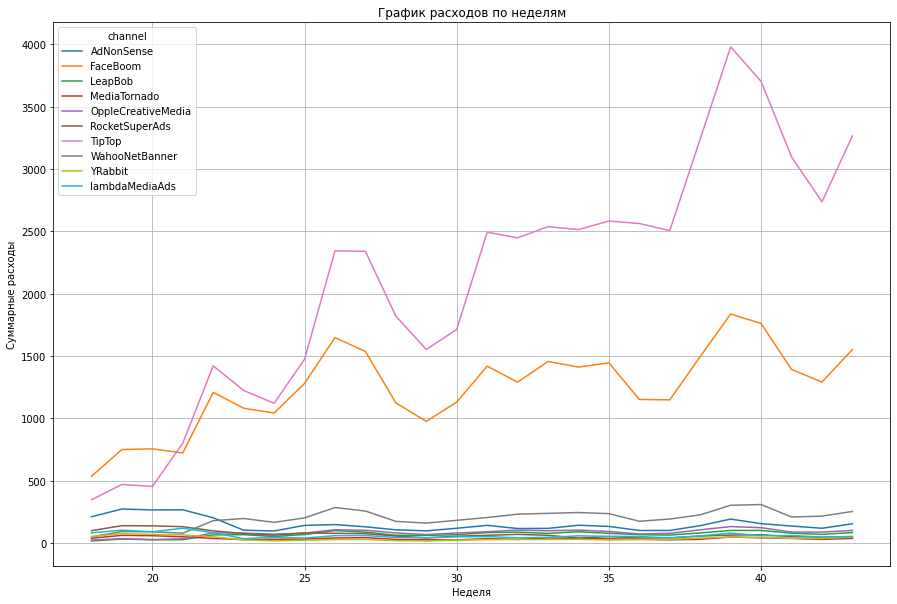

In [22]:
#  динамика изменения расходов во времени по неделям по каждому источнику.
d2 = costs.pivot_table(index = 'week',
                        columns = 'channel',
                        values = 'costs',
                        aggfunc = 'sum')
d2 = d2.plot(figsize = (15, 10), grid=True)
plt.title('График расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Суммарные расходы')
plt.show() 

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь требуется построить два графика по неделям и месяцам. Сейчас построен график только по неделям и график без отдельной разбивки по периоду. Не хватает графика по месяцам


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо

In [23]:
# Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
# Используйте профили пользователей.
result = (
        profiles
        .groupby('channel') # группируем по критерию
        .agg({
                #'channel': 'nunique', # считаем уникальных пользователей
                'acquisition_cost': 'mean' # сумма трат
            }) 
         )
result = result.sort_values('acquisition_cost', ascending=False) 
result1 = result.query('channel != "organic"')
result = result.style.format({'acquisition_cost': "{:,.2f}"})
display(result)
print()
#result1 = result.query('channel != "organic"') #исключаем "бесплатных" пользователей
print('Средняя стоимость привлечения одного пользователя по всем каналам:', round(result1['acquisition_cost'].mean(), 2) )

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22



Средняя стоимость привлечения одного пользователя по всем каналам: 0.76


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
✅ TipTop с отрывом опережает остальные каналы по САС. Я бы еще советовал округлить значения в таблице, например, до двух знаков, чтобы их проще было считывать

Вывод.
1. Рассчитали сумма расходов на маркетинг: 105497
2. Выяснили источники наибольших трат на рекламу: TipTop 54751.30, FaceBoom 32445.60
3. Визуализировали динамику изменения расходов во времени по месяцам по каждому источнику
 - до середины июня расходы на TipTop и FaceBoom были сопоставимы, затем расоды на TipTop продолжили расти, а расходы на FaceBoom остались на прежнем уровне до конца наблюдения. 
 - расходы на YRabbit и MediaTornado на старте были высокими, но уже в первом месяце упали правтически до 0. По всей видимости, это была разовая/пробная акция.
3.1. Визуализация динамики изменения расходов во времени по неделям по каждому источнику соответвует графику по месяцам, лишь более детально отражает колебания.
4. Рассчитали стоимость привлечения одного пользователя для каждого канала и среднюю по всем каналам:
 - TipTop 2.8, FaceBoom 1.1
 - средяя по всем каналам 0.76

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

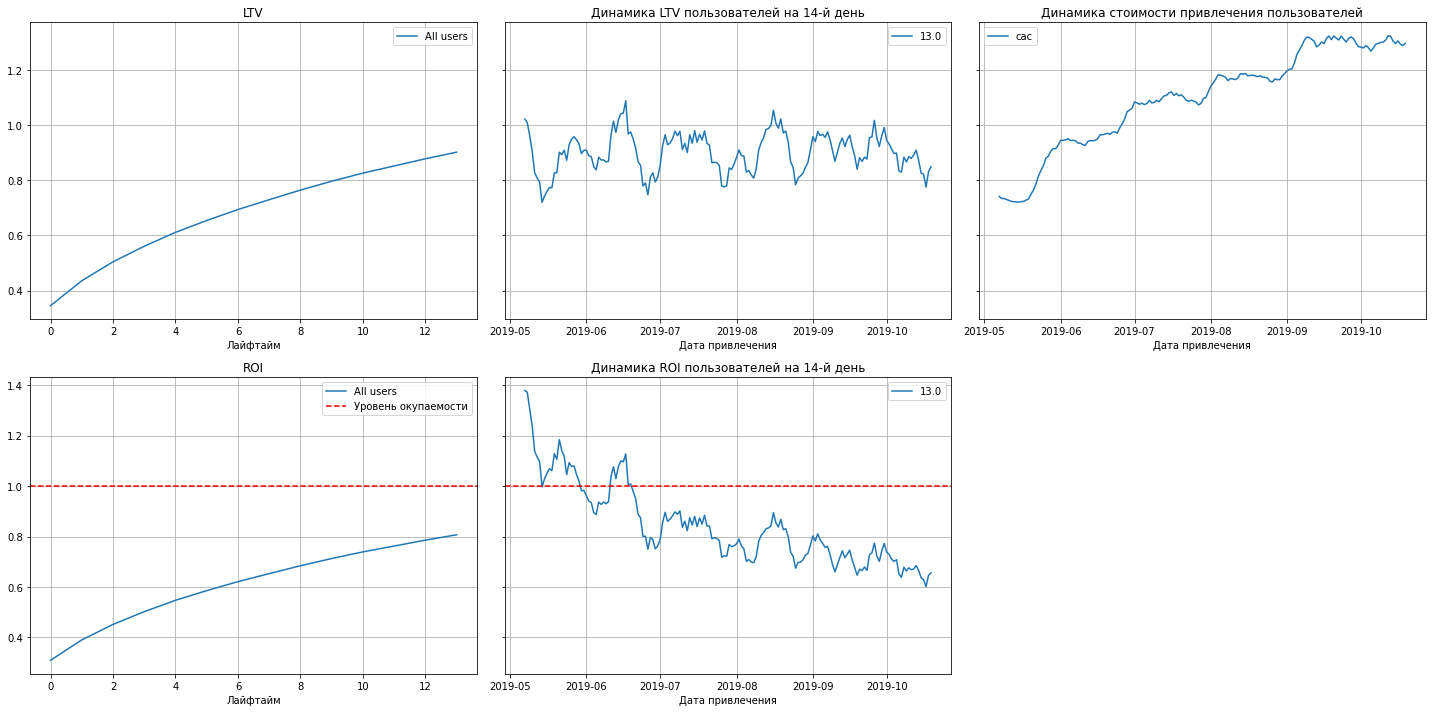

In [24]:
# Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles = profiles.query('channel != "organic"')

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Здесь и ниже необходимо отфильтровать органических пользователей. В данном разделе мы оцениваем окупаемость рекламы. На органических пользователей мы же не тратим средства. С "органиками" результаты искажаются, т.к. учитываем тех, кто не видел рекламу.
    
Далее необходимо будет скорректировать выводы по итогам анализа. Убедиться, что под всеми графиками даны комментарии по LTV, CAC и ROI (по всем трем метрикам, а не по одной или двум). Желательно обратить внимание на всплески на графиках с динамикой ROI и CAC. Также прокомментировать все графики по удержанию и конверсии. Комментарии по содержанию оставлю после удаления "органиков".

По графикам можно сделать такие выводы:
1. LTV постоянно растет - все в порядке
2. Динамика LTV пользователей держится в диапазоне от 0.8 до 1
3. Динамика стоимости привлечения клиентов растет на всем периоде наблюдния 
4. Реклама не окупается. ROI в конце 2 ой недели полько приблизился в границе окупаемости ( к 0.9 ) 
5. Динамика ROI пользоватетелей отрицательная начиная со 2ой четверит периода наблюднения. С ростом общих трат на рекламу ROI пользоватетей пропорционально снижается. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ На графике явно видим, что реклама не окупается (ROI ниже единицы). 
     
LTV в компаниях, как правило, постоянно растет. Если бы мы увидели падение, это означало, скорее всего, наличие ошибки в расчетах. Но на графике LTV стабилен. 
    
Стоимость привлечения пользователей (CAC) со временем увеличивалась; она окупалась только в мае-июне. CAC может быть какой угодно в зависимости, например, от того, какая цена рекламы была установлена.    

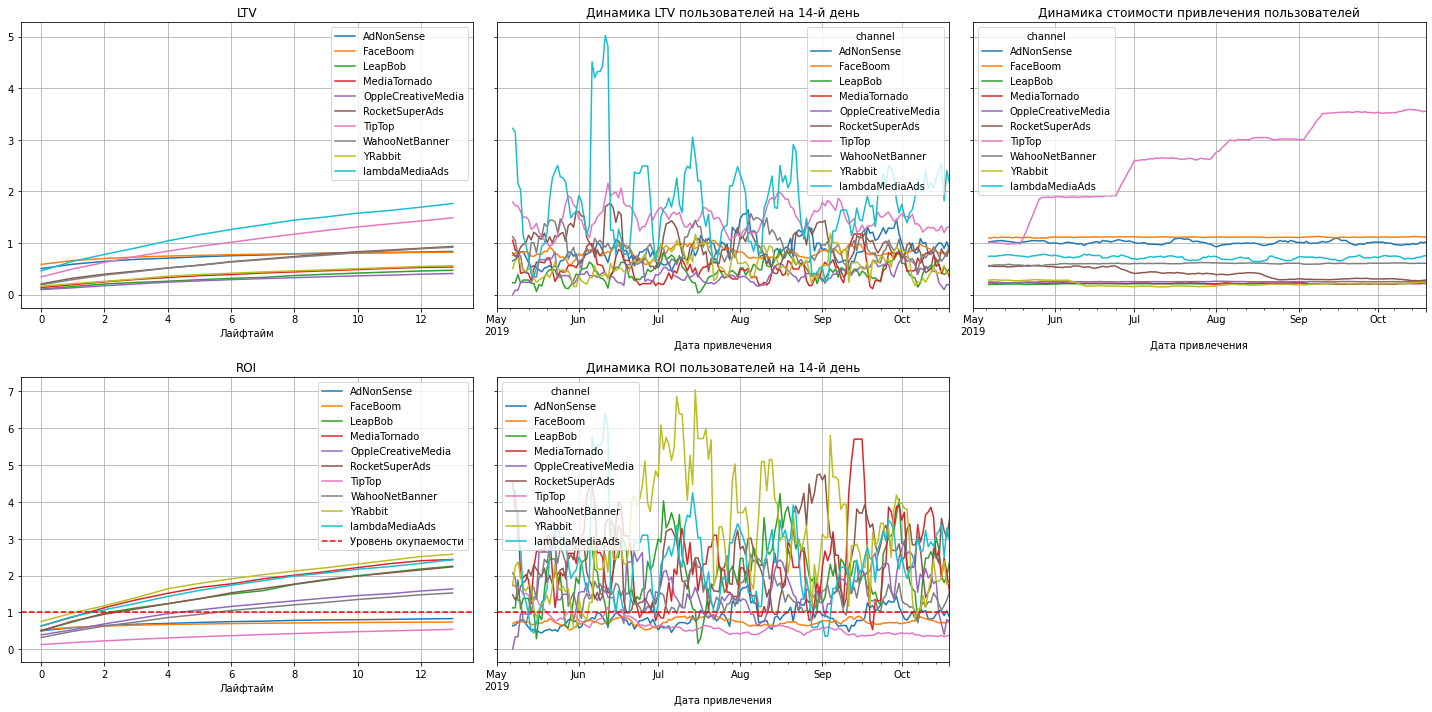

In [25]:
# Общая окупаемость рекламы с разбивкой по каналам. 
# Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['channel']
# получаем те же данные, с учетом рекламных каналов
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions)

# строим 4 графика по полученным данным, сглаживаем их скользящим средним с размером окна 7
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

Вывод.
LTV показывает положительную динамику по всем источникам. Лидеры lambdaMediaAds и TipTop. 
Динамика LTV lambdaMediaAds и TipTop со всплесками, возможно, это сезонные акции, распродажи выходного дня или подобное. 
Динамика стомости привлечения пользователей. TipTop демонстрирует стабильный рост на протяжении всего периода наблюдений.
Реклама не окупается по 3 каналам: TipTop, FaceBoom, AdNonSence. Хуже всего дела у TipTop.
Динамика RIO. Положительная практичски у всех каналов, за исключением TipTop и FaceBoom

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Лидерами по LTV являются lambdaMediaAds и TipTop. Не окупаются три канала. У канала TipTop стоимость привлечения пользователей заметно больше, чем у других каналов. Дорогая реклама приносит убыток компании. 

Есть ли какой-либо необычный всплеск на графике с динамикой ROI?

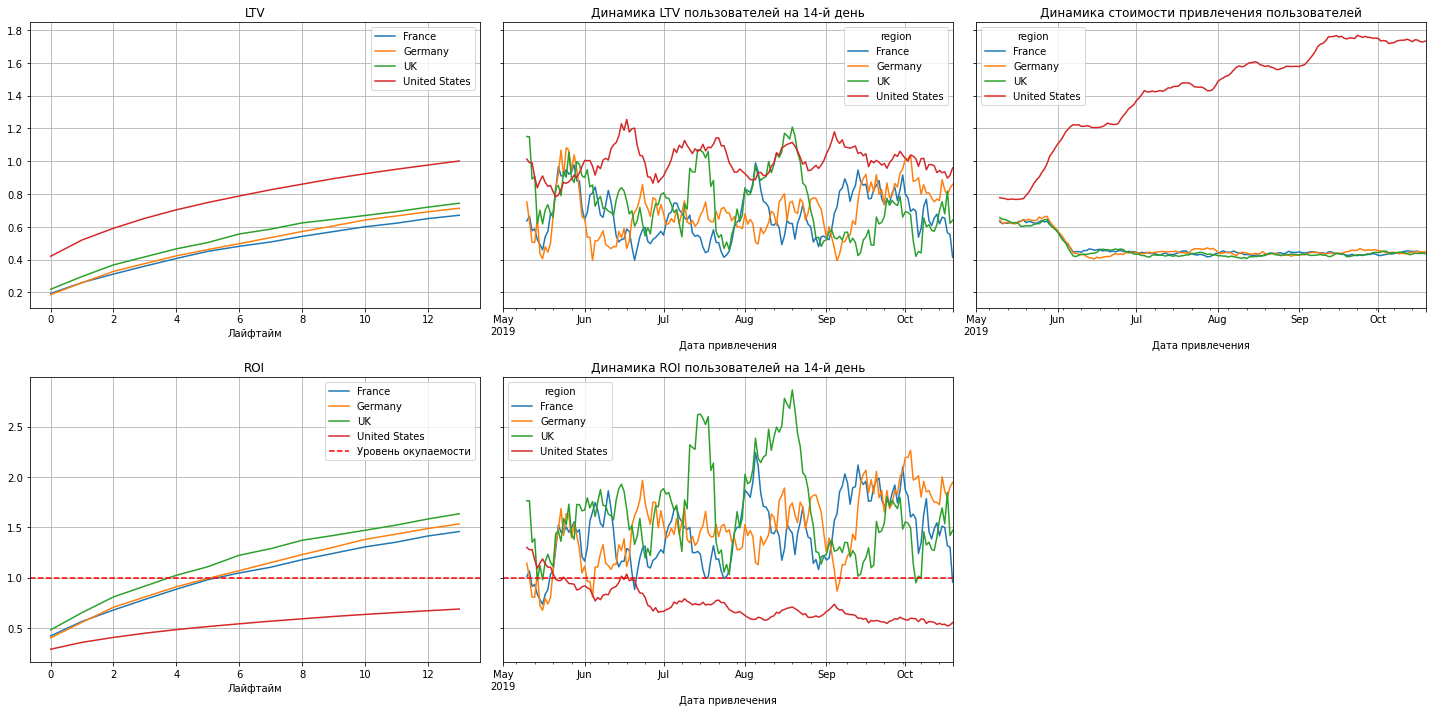

In [26]:
# Общая окупаемость рекламы с разбивкой по странам. 
# Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['region']
# получаем те же данные, с учетом региона привлечения
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions)

# строим 4 графика по полученным данным, сглаживаем их скользящим средним с размером окна 10
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=10)

Вывод.
LTV показывает положительную динамику по всем источникам. Лидер US. 
Динамика LTV в US стабильно высокая, UK наблюдаются всплески, динамика волнообразная, Germany и France демонстрируют среднестабильный показатель на протяжении наблюдения.
Динамика стомости привлечения пользователей. US демонстрирует стабильный рост на протяжении всего периода наблюдений, в то время как по остальным странам уже после 1го месяца произошло снижение, а затем стоимость стабилизировалась. 
Реклама окупается по 3 странам: Germany, France, UK уже с середины наблюдения. В US реклама не окупается. 
Динамика RIO. Положительная у всех стран, за исключением US.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Хорошо, реклама не окупается только в США. И только в этой стране растет стоимость привлечения. При этом LTV - самый высокий среди представленных стран.


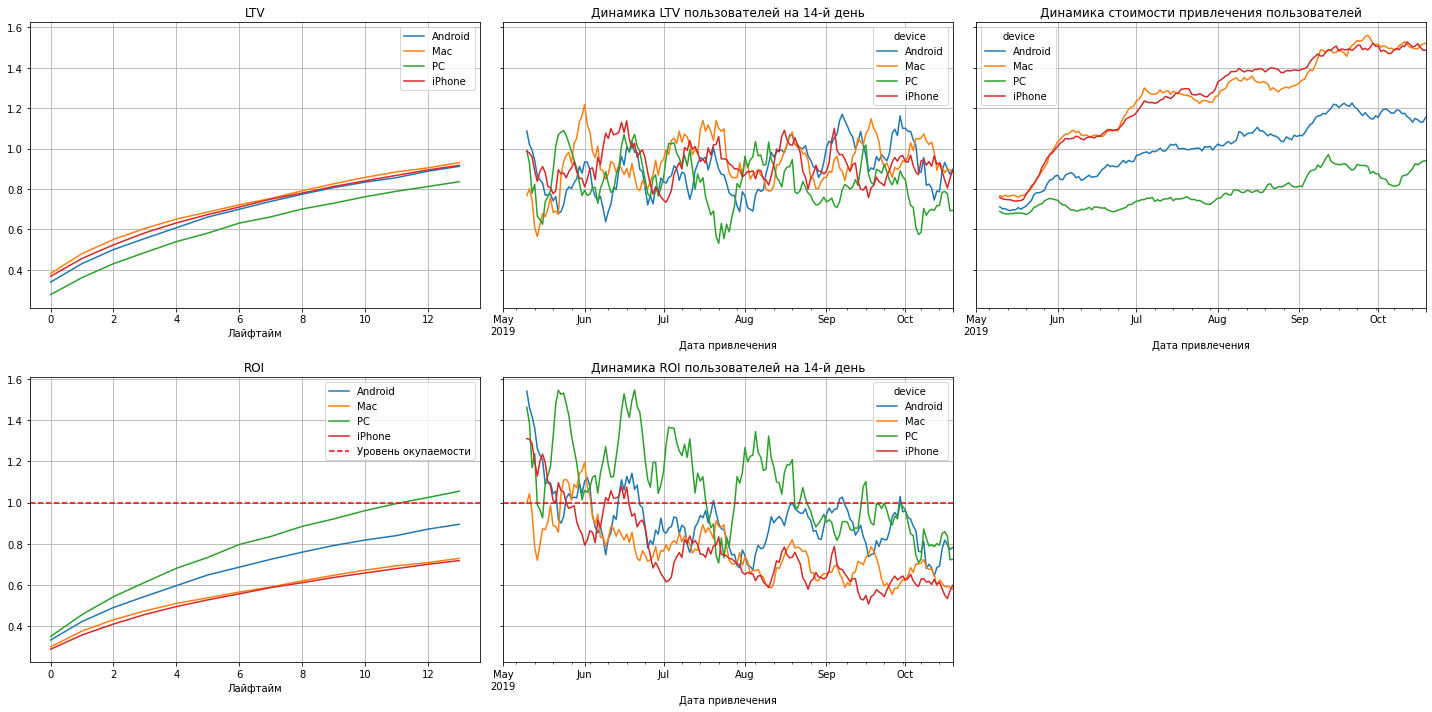

In [27]:
# Общая окупаемость рекламы с разбивкой по устройствам. 
# Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['device']
# получаем те же данные, с учетом устройства
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions)

# строим 4 графика по полученным данным, сглаживаем их скользящим средним с размером окна 10
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=10)

Вывод.
LTV показывает положительную динамику по всем устройствам. PC отстает от тройки лидеров. 
Динамика LTV. Все устройства демонстрируют среднестабильный показатель на протяжении наблюдения.
Динамика стомости привлечения плавно растет по всем устройствам на протяжении наблюдения.
Реклама окупается на PC лишь в конце наблюдения. 
Динамика RIO. Отрицательная для всех устройств к концу наблюдения.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Здесь мы видим, что с окупаемостью проблемы по всем устройствам, кроме PC. САС по устройствам Apple больше PC и Android. LTV у всех почти одинаковый, чуть ниже он у PC.
  

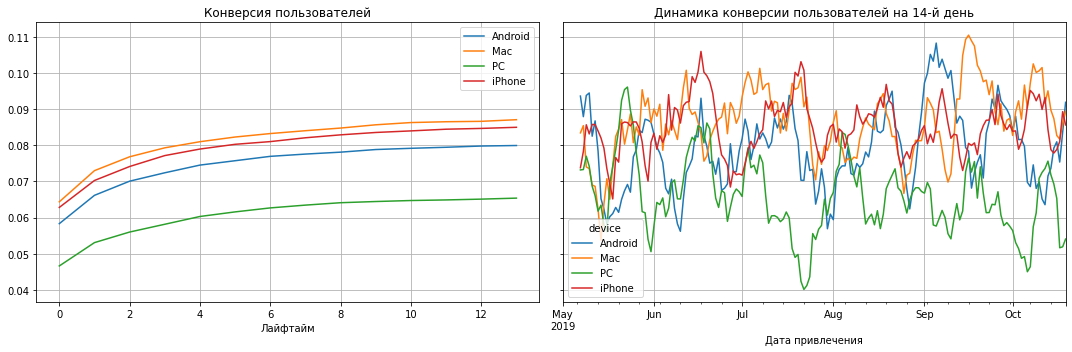

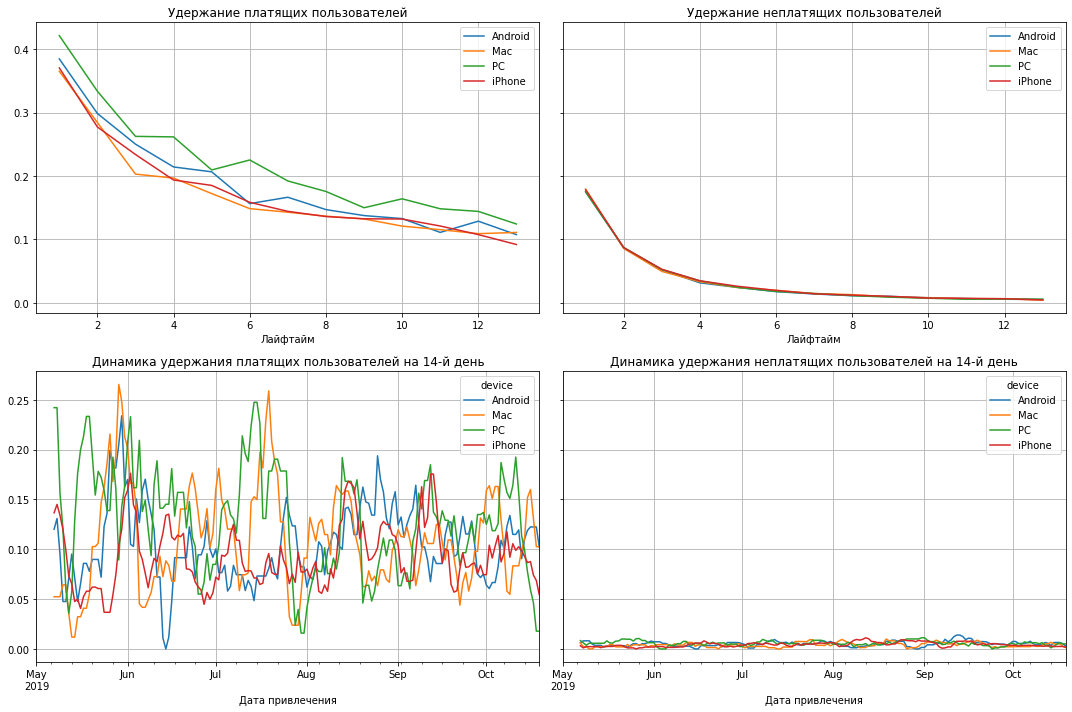

In [28]:
# Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. 
# Постройте и изучите графики конверсии и удержания.

# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод:
Конверсия по устройсвам положительная. Mac, iphone в лидерах, PC отстают.
"Платящие" пользователи на всех устройсвах удерживаются плохо (к концу 14 дня ниже 20%).
Удержание "не платящих" стемится к 0 (к концу 14 дня ниже 2%). 

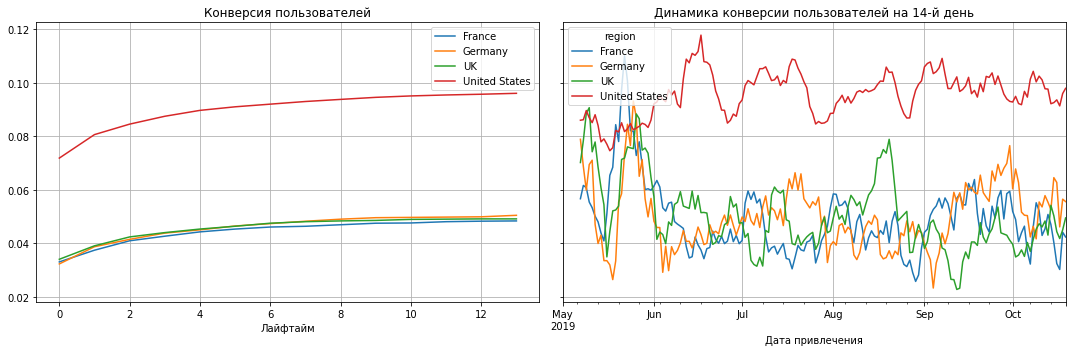

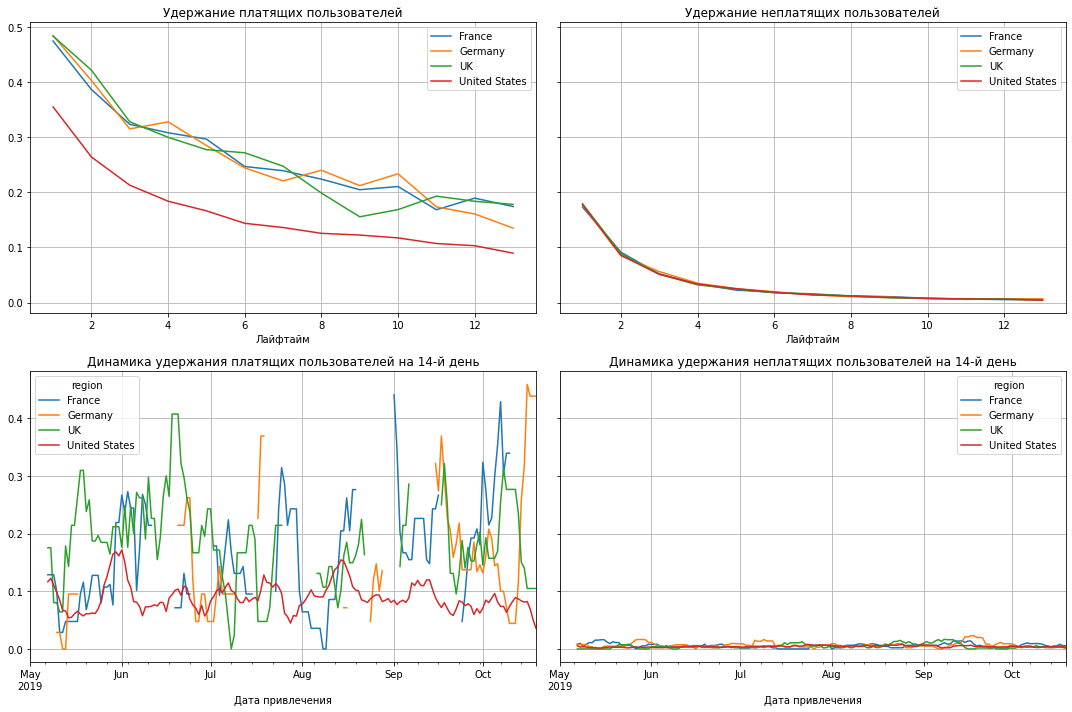

In [29]:
# Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. 
# Постройте и изучите графики конверсии и удержания.

# смотрим конверсию с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод.
По конверсия пользователей US однозначный лидер с большим отрывом на всем периоде исследоваия. У остальных стран конверсия положительная и, приблизительно, равная. 
Удержание у всех стран снижаетя с течением времени, самое низкое у пользователей US (на 4ый день менее 20%). У остальных стран, приблизительно, равное.
У "неплатящих" пользователей на 4ый день удержание в районе 5% и стремится к 0.

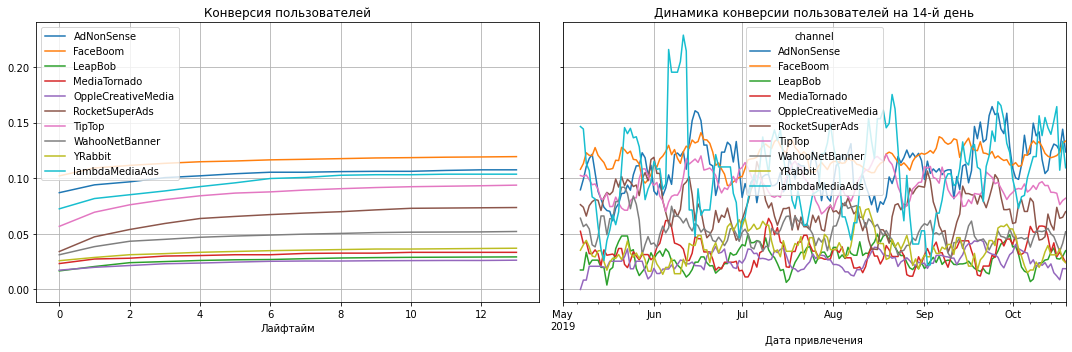

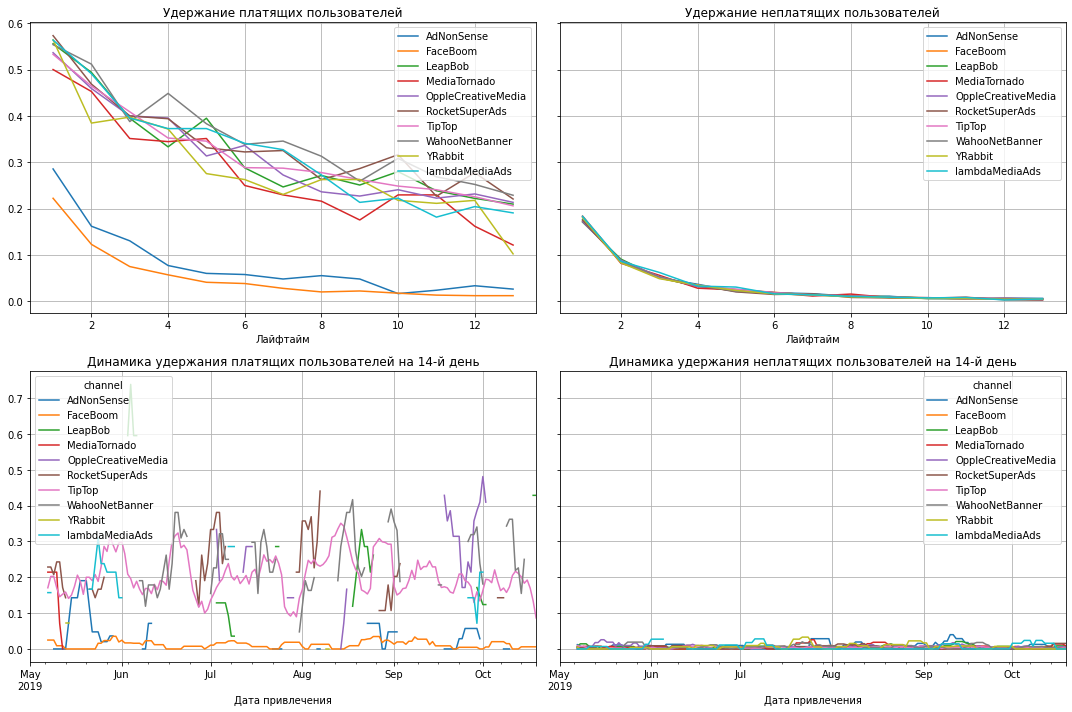

In [30]:
# Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. 
# Постройте и изучите графики конверсии и удержания.

# смотрим конверсию с разбивкой по источникам рекламы 

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по источникам рекламы

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод.
Конврсия у FaceBoom самая высокая, TipTop держится по середине. 
При этом FaceBoom проваливает удержание до уровня меньше 5%. Остальные источники идут примерно одинаково.

<div class="alert alert-block alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"></h2>
    
❌ Кроме конверсии и удержания, необходимо на графиках проанализировать CAC, LTV и ROI в разрезе устройств, стран и каналов. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅  Самая низкая конверсия у пользователей PC, самая высокая - Mac и iPhone. Удержание примерно одинаковое на всех устройствах, показывает стабильно убывающий тренд. Динамику удержания в разбивке по датам можно посмотреть и в таблице. Называется она filtered_data в функции plot_retention (чтобы ее вывести, нужно в конце функции добавить return filtered_data).
    
Конверсия в США существенно больше, чем в других странах. При этом по удержанию занимают последнее место. 
    
По конверсии FaceBoom и AdNonSense лидируют, при этом по удержанию есть проблема "дырявого ведра", когда пользователи уходят из приложения в бóльших масштабах, чем ожидается. Новые пользователи, пришедшие из этих каналов, слабо конвертируются в постоянных клиентов. TipTop, отличающийся дорогой рекламой, по удержанию не выделяется на общем фоне. Качество аудитории в разных каналах различается. Может играть роль и фактор самого канала, в какой момент и как именно он цепляет внимание пользователя. Чтобы улучшить метрики в целом, важно развивать те каналы, которые позволяют эффективнее доносить ценность продукта. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
✅ Дополнительно о том, какую конверсию в активацию считать хорошей и как ее улучшить можно прочитать [здесь](https://gopractice.ru/product/what-is-good-activation-rate/)
    
Как улучшить удержание, можно почитать в статье по [этой ссылке](https://gopractice.ru/product/retention/)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Также можно провести дополнительный анализ окупаемости рекламы с разбивкой по рекламным каналам для США и отдельно для европейских стран.
    
В частности, можно ответить на вопрос, куда лучше перенаправить рекламный бюджет в США. Какой источник показывает неплохую конверсию, хороший ROI и высокое удержание платящих пользователей на американском рынке?


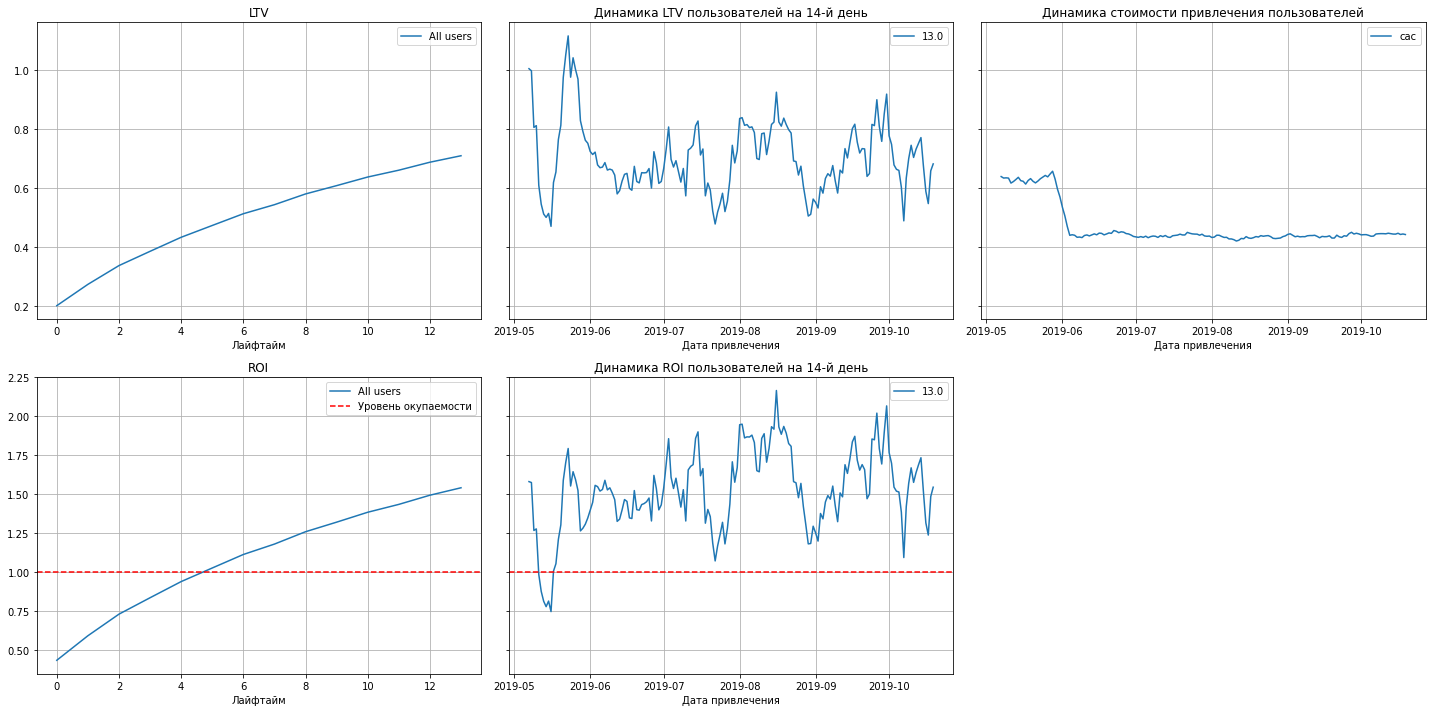

In [31]:
# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region != "United States"'), orders, observation_date, horizon_days # исключаем США
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Вывод. 
Очевидно, что без США рекламная компания прекрсно окупается. 
Проанализируем ренион США подробнее, посморим какие рекламные канала работают лучше и хуже всего.

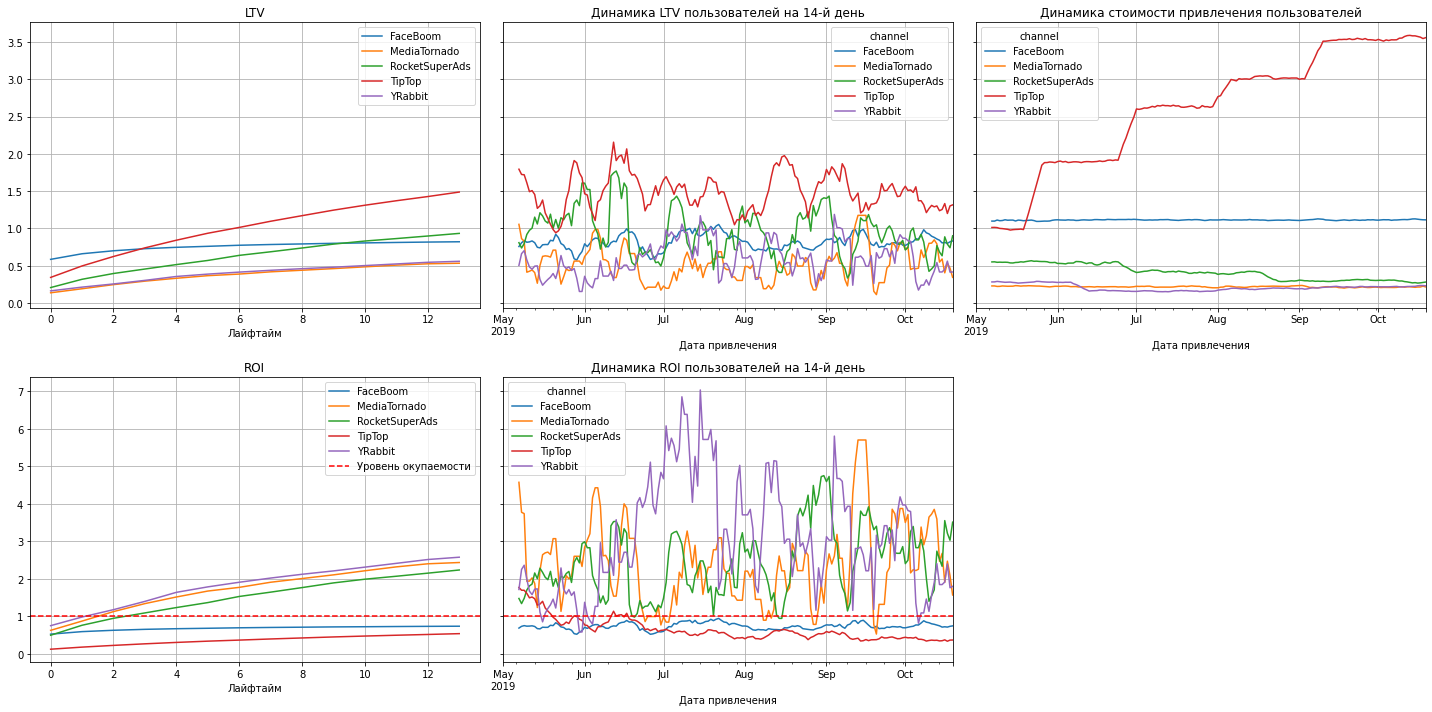

In [32]:
# Общая окупаемость рекламы с разбивкой по каналам. 
# Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

dimensions = ['channel']
# получаем те же данные, с учетом рекламных каналов
ltv_raw, ltv_grouped, ltv_in_time, roi_grouped, roi_in_time = get_ltv(profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions)

# строим 4 графика по полученным данным, сглаживаем их скользящим средним с размером окна 7
plot_ltv_roi(ltv_grouped, ltv_in_time, roi_grouped, roi_in_time, horizon_days, window=7)

Вывод.
2 самых высокобюджетных канала рекламы TipTop и FaceBoom не окупаются. Все остальные в плюсе! 

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_2: <a class="tocSkip"> </h2>
    
⚠️ Какой канал стоило бы рекомендовать? Что можно сказать про RocketSuperAds, какие у него результаты?

Вопрос №1:
    Окупается ли реклама, направленная на привлечение пользователей в целом?
Ответ №1: 
    Реклама, направленная на привлечение пользователей в целом не окупается! ROI в конце 2 ой недели полько приблизился в границе окупаемости.
    
Вопрос №2:
    Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Ответ №2:
    С устройствами не все однозначно, пользователи PC демонстрируют худшую конверсию, но при этом лучшее удержание. Пользователи остальных устройств демонстрируют схожие показатели конверсии и удержания. Такие образом выделить "проблемных" пользователей по устойствам не получается.
    Однозначно убыточная страна - США, в которой на находятся 2 свмых дорогих источника рекламы FaceBoom и TipTop, которые, в свою очередь и являются главной проблемой провала рекламной компании. 
    
Вывод:
Рекомендации:
1. Пересмотреть рекламную компанию с США! В частности, отказаться от рекламных каналов TipTop и FaceBoom. 
2. Следует перераспределить средсва, выделяемые на привлечния клиентов, по другим рекламным катанал. Предпочтение отдавать тем, которые имеют хорошую конверсию и удержание, а так же не высокую стоимость привлечения клиетна.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Вывод.

1. Предобработка данных:
    1. Получена информация о таблицах
    2. Имена столбцов приведены к нижнему регистру, пробелы заменены '_'
    3. Пропуски и дубликаты отсутсвуют 
    4. Даты приведены к соответствующему формату
    
2.  Функции для расчёта и анализа LTV, ROI, удержания и конверсии.
    
    Функции для вычисления значений метрик:
    get_profiles() — для создания профилей пользователей,
    get_retention() — для подсчёта Retention Rate,
    get_conversion() — для подсчёта конверсии,
    get_ltv() — для подсчёта LTV.

    Функции для построения графиков:
    filter_data() — для сглаживания данных,
    plot_retention() — для построения графика Retention Rate,
    plot_conversion() — для построения графика конверсии,
    plot_ltv_roi — для визуализации LTV и ROI.
    get_profiles() — для создания профилей пользя    

3.  Исследовательский анализ данных
    В Регионе United States самое большое количество пользователей и доля платящих пользователей.
    Пользователей среди владельцев iPhone самое большое количество, а самыми плаятщими являются пользователи владеющими устройствами Mac.
    Пользователи "пришедшие" по своей инициативе ("organic") самые многочисленные и самые "не платящие". Самые "платящие" пользователи привлеченны каналом "FaceBoom".
    Главной причиной неудач проведенной рекламной компании является неэффетивная работа рекламных источников. С одной стороны мы имеем канал TipTop, затраты на который максимальны, но конвервия находится на среднем уровне, а с другой, канал FaceBoom, который имеет, пусть и вдвое меньшее количество затрат на рекламу, но остается 2м по расходмам. К конверсии FaceBoom нет притензий - она максимальная, а удержание стремится к 0. 
    Таким образом, 2 самых дорогих канала демонстрируют низкую эффективность, как следствие, об окупаемости рекламы не может идти и речи.

4.  Маркетинг
    1. Рассчитали сумма расходов на маркетинг: 105497
    2. Выяснили источники наибольших трат на рекламу: TipTop 54751.30, FaceBoom 32445.60
    3. Визуализировали динамику изменения расходов во времени по месяцам по каждому источнику
         - до середины июня расходы на TipTop и FaceBoom были сопоставимы, затем расоды на TipTop продолжили расти, а расходы на FaceBoom остались на прежнем уровне до конца наблюдения. 
         - расходы на YRabbit и MediaTornado на старте были высокими, но уже в первом месяце упали правтически до 0. По всей видимости, это была разовая/пробная акция.
    4. Рассчитали стоимость привлечения одного пользователя для каждого канала и среднюю по всем каналам:
         - TipTop 2.8, FaceBoom 1.1
         - средяя по всем каналам 0.76
         
Вывод.
    Главной причиной неудач проведенной рекламной компании является неэффетивная работа самых высокозатарных рекламных источников FaceBoom и TipTop в регионе США.
Рекомендации.
   Пересмотреть рекламную компанию с США! В частности, отказаться от рекламных каналов TipTop и FaceBoom. 
   Следует перераспределить средсва, выделяемые на привлечния клиентов, по другим рекламным катанал. Предпочтение отдавать тем, которые имеют хорошую конверсию и удержание, а так же не высокую стоимость привлечения клиетна.
   Возможно, имеет смысл обратить внимание на другие регионы, в которых, в совокупности, пользователей довольно много и показатели эффективности рекламы хорошие!

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера v_1: <a class="tocSkip"> </h2>
    
⚠️ Выводы нужно будет перепроверить после удаления "органиков". 
    
В целом, мы видим, что для рынка США выбрана неудачная стратегия закупки трафика, где основные средства были вложены в каналы FaceBoom и TipTop. 

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Итог v_1:</span>
    
Спасибо за работу! Все замечания по проекту, включая общие рекомендации, можно найти через поиск (CTRL+F или COMMAND+F), набрав в окне поиска, например, `v_1`. Замечания, которые необходимо доработать:
* добавить вступление
* построить визуализацию динамики изменения расходов во времени по  месяцам
* отфильтровать органических пользователей и доработать раздел "Оцените окупаемость рекламы"
   
Также добавил рекомендации по улучшению проекта. Жду проект)

<div style="border:solid lightblue 3px; background:#f7faf8; padding: 20px">
<span style="color:darkblue">Итог v_2:</span>

Спасибо за доработанные замечания! Проект принят. 
    
Дополнительно можно почитать о метриках продукта и метриках роста по [ссылке](https://gopractice.ru/product/cohort_analysis/)
    
Успехов в дальнейшем обучении!)